In [1]:
ACCESS_TOKEN = "24.a2a52efe2d9565985bac1a0164647885.2592000.1594082650.282335-20267153"

In [2]:
import json
import requests
from PIL import Image
import base64
import copy
from PIL import ImageDraw
import math

In [9]:
def load_file_in_base64(path):
    """
    载入文件并进行Base64编码

    :param path: <str> 文件路径
    :return: <str> Base64编码后的文件
    """
    with open(path, 'rb') as f:
        return str(base64.b64encode(f.read()), encoding='utf-8')

In [16]:
def save_file_as_base64(path, data):
    """
    将数据进行Base64解码后存储到文件

    :param path: <str> 文件路径
    :param data: <str> Base64编码的数据
    :return: <None>
    """
    with open(path, 'wb') as f:
        f.write(base64.b64decode(data))

In [12]:
def face_merge(target_base64, template_base64):
    """
    人脸融合
    文档地址:https://ai.baidu.com/ai-doc/FACE/5k37c1ti0#%E7%9B%AE%E6%A0%87%E5%9B%BE

    :param target_base64: <str> BASE64格式的目标图
    :param template_base64: <str> BASE64格式的模板图
    :return: <str> BASE64格式的结果图
    """

    # 生成API的Url(含参数）
    request_url = "https://aip.baidubce.com/rest/2.0/face/v1/merge" + "?access_token=" + ACCESS_TOKEN

    # 生成API的请求信息
    params = json.dumps({
        "image_template": {  # 模板图
            "image": template_base64,
            "image_type": "BASE64",
            "quality_control": "NONE"
        },
        "image_target": {  # 目标图
            "image": target_base64,
            "image_type": "BASE64",
            "quality_control": "NONE"
        }
    })  # 如果不使用json.dumps直接请求会报222001错误

    # 生成API的headers
    headers = {'content-type': 'application/json'}

    # 请求API并返回结果
    if response := requests.post(request_url, data=params, headers=headers):
        response_json = response.json()
        if "result" in response_json and response_json["result"] is not None:
            if "merge_image" in response_json["result"] and response_json["result"]["merge_image"] is not None:
                return response_json["result"]["merge_image"]
            else:
                print("调用人脸融合API失败，未找到merge_image属性:", response_json)
        else:
            print("调用人脸融合API失败，未找到result属性:", response_json)
    else:
        print("调用人脸融合API失败，请求失败")

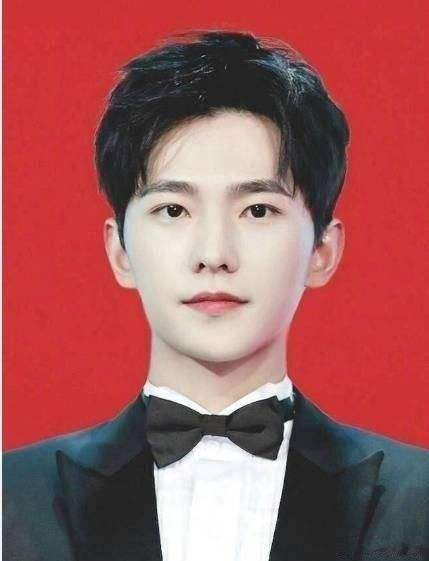

In [6]:
target_path_6 = "E:/[Github]/CUCBiye/API/demo_6.jpg"
target_path = target_path_6
target_img=Image.open(target_path)
target_img

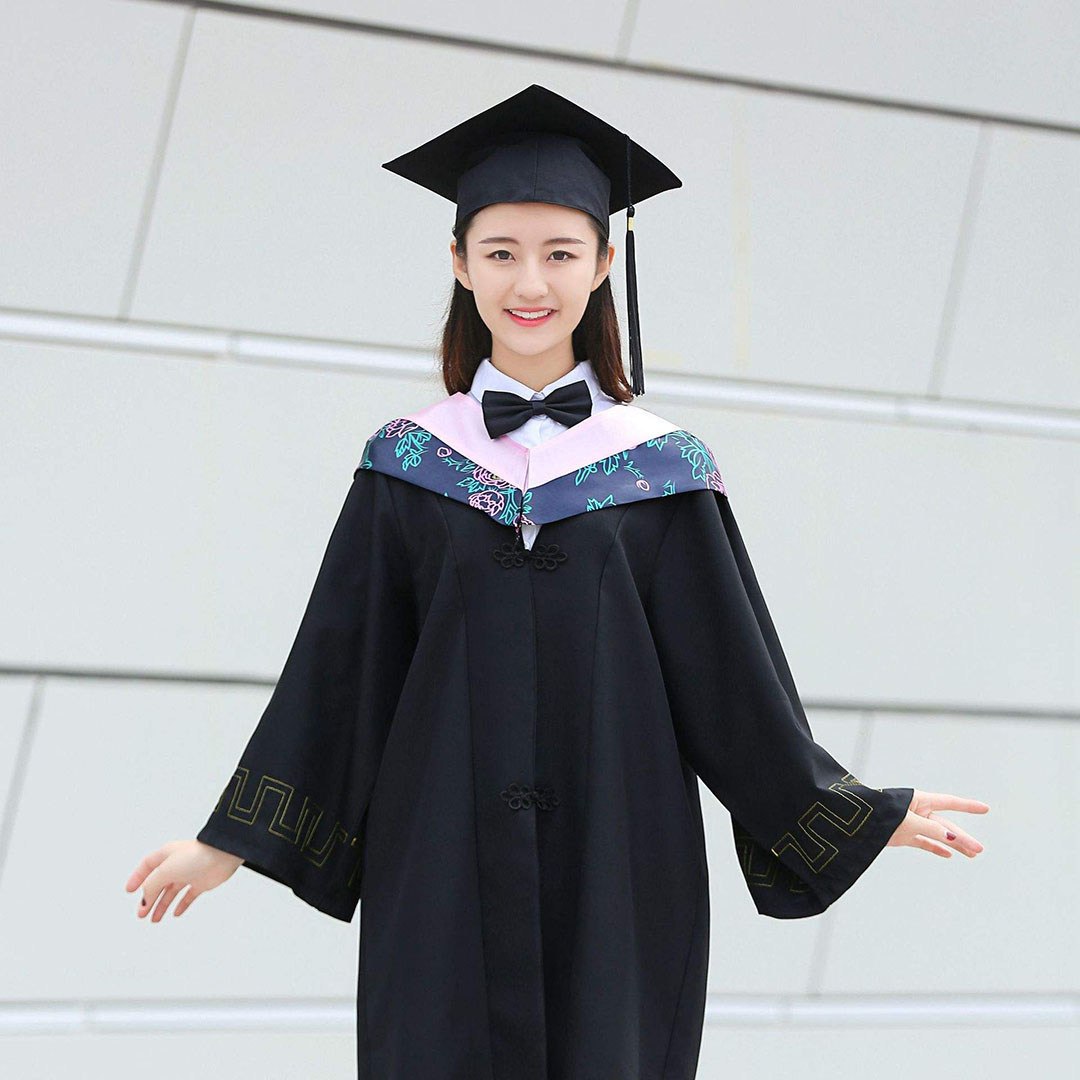

In [7]:
template_path_1 = "E:/[Github]/CUCBiye/API/template_1.jpg"
template_path = template_path_1
template_img=Image.open(template_path)
template_img

In [10]:
target_base64 = load_file_in_base64(target_path)  # 载入目标图
template_base64 = load_file_in_base64(template_path)  # 载入模板图

In [14]:
merge_base64 = face_merge(target_base64, template_base64)  # 请求API

In [15]:
merge_path = "E:/[Github]/CUCBiye/API/merge_1.jpg"

In [17]:
save_file_as_base64(merge_path, merge_base64)  # 将结果图存入到文件中

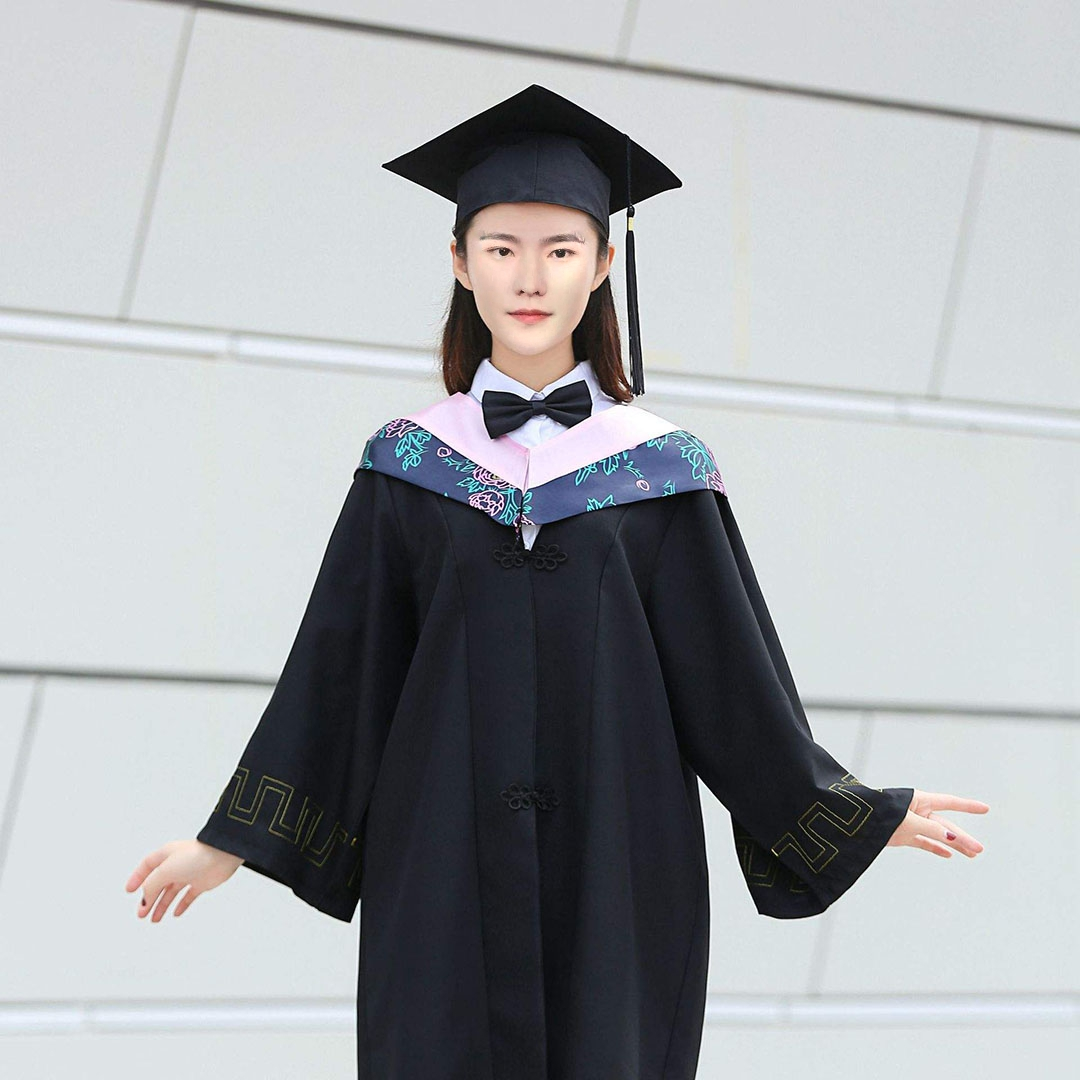

In [18]:
merge_img=Image.open(merge_path)
merge_img